In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('../data/raw/cards.csv')
data.head()


,category,faction,flavor,info,position 1,position 2,position 3,name,group,strength
0,NaN,Neutral,"The beast rushed at them wildly, with fury in ...",Toggle a Unit's Resilience.,Event,NaN,NaN,Adrenaline Rush,Bronze,NaN
1,NaN,Scoia'tael,Better to die standing than to live on bent knee.,"When you have 5 or more Elf Allies, play this ...",Ranged,NaN,NaN,Aelirenn,Silver,6.0
2,NaN,Neutral,The druid Vaedermakar controls the elements. H...,Play a Bronze or Silver Weather card from your...,Event,NaN,NaN,Aeromancy,Silver,NaN
3,NaN,Scoia'tael,Brokilon bleeds… and not even I can heal it.,Deploy: You may Resurrect a Special card from ...,Melee,Ranged,Siege,Aglaïs,Gold,10.0
4,NaN,Nilfgaard,"Pledge your allegiance to our Emperor, Emhyr v...","After 2 turns, at the start of your turn, play...",Melee,Ranged,Siege,Alba Pikeman,Bronze,5.0


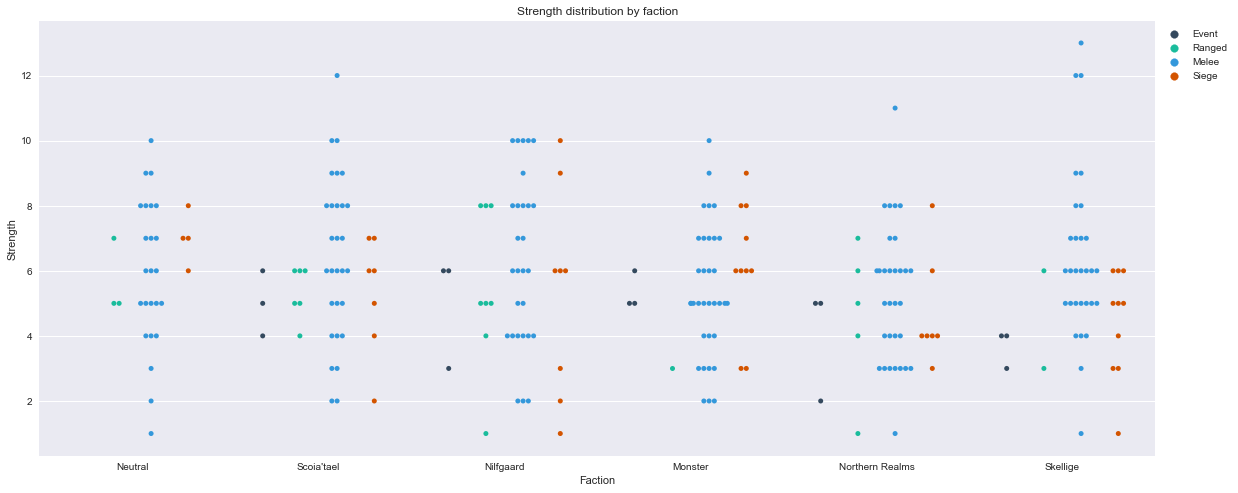

In [4]:
fac_str = data.drop(['category', 'flavor', 'info', 'position 2', 'position 3', 'name', 'group'],
                      axis=1)

colors = ['#34495e', '#1abc9c', '#3498db', '#d35400']

plt.figure(figsize=(20, 8))

ax = sns.swarmplot(data=fac_str, x='faction', y='strength', hue='position 1',
                   palette=colors, split=True)

ax.set(xlabel='Faction', ylabel='Strength')
plt.title('Strength distribution by faction')
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()

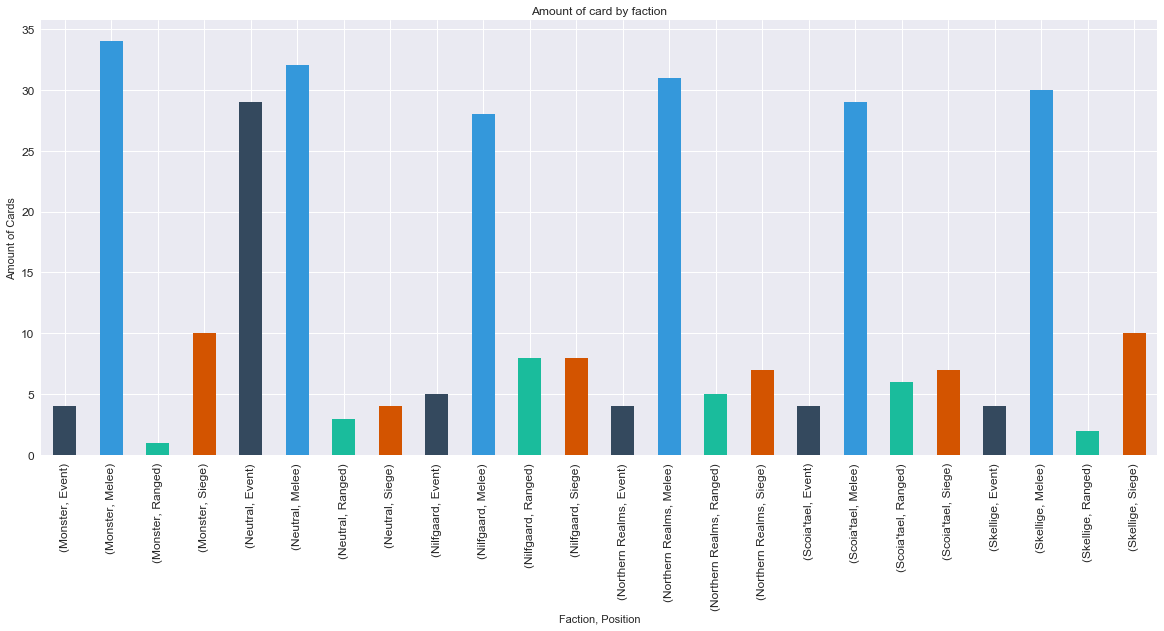

In [23]:
# count types of cards for each faction

colors = ['#34495e', '#3498db', '#1abc9c', '#d35400']

cnt_fct = data.groupby('faction')['position 1'].value_counts(sort=False)

plt.figure(figsize=(20, 8))

ax = cnt_fct.plot.bar(color=colors, title ='Amount of card by faction', fontsize=12)
ax.set(xlabel='Faction, Position', ylabel='Amount of Cards')
plt.show()

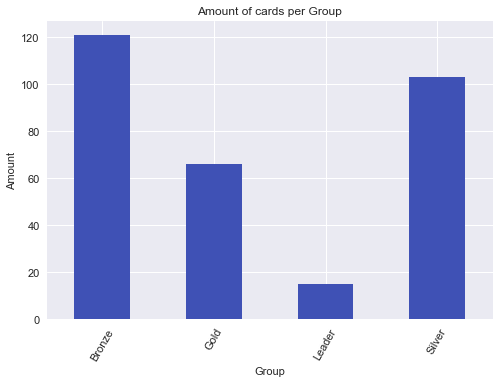

In [10]:
# How rarity is distributed ?

grp_data = data.groupby(['group']).count().drop(['category', 'flavor', 'info', 'position 1',
                                      'position 2', 'position 3', 'faction', 'strength'],
                                     axis=1)
grp_data.columns = ['amount']
ax = grp_data.plot.bar(color='#3F51B5', title='Amount of cards per Group', fontsize=11, legend=False)
ax.set(xlabel='Group', ylabel='Amount')
plt.xticks(rotation=60)
plt.show()
